In [1]:
# PACKAGE
import numpy as np
import numpy.linalg as la
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#PageRank for an arbitrarily sized internet

In [ ]:
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    
    r = 100 * np.ones(n) / n
    lastR = r
    r = M @ r
    i = 0
    while la.norm(lastR - r) > 0.01 :
        lastR = r
        r = M @ r
        i += 1
   
    
    return r


# Dataset

In [2]:
df = pd.read_csv("/content/drive/My Drive/BENMAX-ITS/Programming/PageRank_COVID-19/assets/responses_matrix.csv", sep=';')
df = df.drop(columns="id")

In [ ]:
print(df)

    A  B  C  D  E  F  G  H  I  J  K  ...  AF  AG  AH  AI  AJ  AK  AL  AM  AN  AO  AP
0   0  1  0  0  1  0  0  0  1  0  0  ...   0   0   0   0   1   0   0   1   0   0   0
1   0  1  0  0  0  1  0  0  1  0  0  ...   0   0   0   0   1   0   0   1   0   0   0
2   0  1  0  0  1  0  0  0  1  0  0  ...   1   1   0   1   0   0   0   1   0   0   0
3   0  1  0  0  0  0  0  1  0  0  0  ...   0   1   0   0   0   1   1   0   0   0   0
4   0  1  0  1  0  0  0  1  0  0  0  ...   0   1   0   0   0   1   1   0   0   0   0
5   1  0  0  0  1  0  0  0  1  0  0  ...   0   1   0   1   0   0   1   0   0   0   0
6   0  1  0  0  1  0  0  1  0  0  0  ...   0   1   0   0   0   1   0   1   0   0   0
7   0  0  0  0  0  1  0  0  1  0  0  ...   1   1   0   0   1   0   0   1   0   0   1
8   0  1  0  0  0  0  1  0  0  1  0  ...   1   1   0   0   1   0   0   0   1   1   0
9   1  1  0  0  0  0  0  1  0  0  0  ...   0   1   0   0   1   0   0   1   0   0   0
10  1  1  0  0  1  0  0  0  1  0  0  ...   1   1   0   0   1   0 

In [3]:
total = df.iloc[0]
for r in range(1,len(df)):
  total = total + df.iloc[r]
print(total)

A      9
B     17
C      2
D      3
E      8
F      4
G      3
H      4
I     10
J      4
K      2
L      5
M     19
N     14
O      6
P      6
Q     17
R      4
S     16
T     12
U     18
V     16
W     15
X      6
Y     11
Z     10
AA     4
AB    16
AC    12
AD     3
AE    11
AF     9
AG    14
AH     1
AI     3
AJ    10
AK     6
AL     5
AM    12
AN     3
AO     1
AP     1
dtype: int64


In [ ]:
total[1]-total[0]

8

#NetworkX

In [4]:
dir = []
for i in range(len(total)):
  for j in range(i+1, len(total)):
    print('i:', i)
    print('j:', j)
    
    if i<=25:
      if j<=25:
        if total[i]>total[j]:
          dir.append([chr(65+i), chr(65+j), total[i]-total[j]])
          print(chr(65+i), chr(65+j), total[i]-total[j])
        elif total[i]<total[j]:
          dir.append([chr(65+j), chr(65+i), total[j]-total[i]])
          print([chr(65+j), chr(65+i), total[j]-total[i]])
      elif j>25:
        if total[i]>total[j]:
          dir.append([chr(65+i), "A" + chr(39+j), total[i]-total[j]])
          print(chr(65+i), chr(65+j), total[i]-total[j])
        elif total[i]<total[j]:
          dir.append(["A" + chr(39+j), chr(65+i), total[j]-total[i]])
          print([chr(65+j), chr(65+i), total[j]-total[i]])
  
    elif i>25:
      if total[i]>total[j]:
        dir.append(["A" + chr(39+i), "A" + chr(39+j), total[i]-total[j]])
        print(["A" + chr(39+i), "A" + chr(39+j), total[i]-total[j]])
      elif total[i]<total[j]:
        dir.append(["A" + chr(39+j), "A" + chr(39+i), total[j]-total[i]])
        print(["A" + chr(39+j), "A" + chr(39+i), total[j]-total[i]])
    print()
print(dir)


i: 0
j: 1
['B', 'A', 8]

i: 0
j: 2
A C 7

i: 0
j: 3
A D 6

i: 0
j: 4
A E 1

i: 0
j: 5
A F 5

i: 0
j: 6
A G 6

i: 0
j: 7
A H 5

i: 0
j: 8
['I', 'A', 1]

i: 0
j: 9
A J 5

i: 0
j: 10
A K 7

i: 0
j: 11
A L 4

i: 0
j: 12
['M', 'A', 10]

i: 0
j: 13
['N', 'A', 5]

i: 0
j: 14
A O 3

i: 0
j: 15
A P 3

i: 0
j: 16
['Q', 'A', 8]

i: 0
j: 17
A R 5

i: 0
j: 18
['S', 'A', 7]

i: 0
j: 19
['T', 'A', 3]

i: 0
j: 20
['U', 'A', 9]

i: 0
j: 21
['V', 'A', 7]

i: 0
j: 22
['W', 'A', 6]

i: 0
j: 23
A X 3

i: 0
j: 24
['Y', 'A', 2]

i: 0
j: 25
['Z', 'A', 1]

i: 0
j: 26
A [ 5

i: 0
j: 27
['\\', 'A', 7]

i: 0
j: 28
[']', 'A', 3]

i: 0
j: 29
A ^ 6

i: 0
j: 30
['_', 'A', 2]

i: 0
j: 31

i: 0
j: 32
['a', 'A', 5]

i: 0
j: 33
A b 8

i: 0
j: 34
A c 6

i: 0
j: 35
['d', 'A', 1]

i: 0
j: 36
A e 3

i: 0
j: 37
A f 4

i: 0
j: 38
['g', 'A', 3]

i: 0
j: 39
A h 6

i: 0
j: 40
A i 8

i: 0
j: 41
A j 8

i: 1
j: 2
B C 15

i: 1
j: 3
B D 14

i: 1
j: 4
B E 9

i: 1
j: 5
B F 13

i: 1
j: 6
B G 14

i: 1
j: 7
B H 13

i: 1
j: 8
B I 7

i: 1
j:

In [ ]:
len(dir)

817

In [ ]:
dir[816]

['AN', 'AP', 2]

In [ ]:
nx.MultiGraph.add_weighted_edges_from?

In [ ]:
nx.DiGraph?

In [ ]:
DG = nx.DiGraph()

DG.add_weighted_edges_from(dir)


In [ ]:
edge = [("A", "B", 0.5)]

In [ ]:
edge.append([("B", "C", 0.75)])

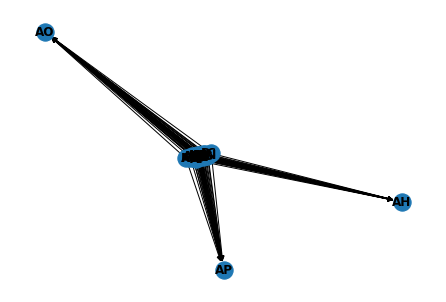

In [ ]:
nx.draw(DG, with_labels=True, font_weight='bold')

In [ ]:
weight = nx.algorithms.link_analysis.pagerank_alg.pagerank(DG)

In [ ]:
weight

{'A': 0.012676106031437958,
 'AA': 0.020917712028481215,
 'AB': 0.010105318129552482,
 'AC': 0.010994464421834273,
 'AD': 0.02890819727367156,
 'AE': 0.011403214062275454,
 'AF': 0.01267610603143796,
 'AG': 0.010465983687846233,
 'AH': 0.10521685510184116,
 'AI': 0.02890819727367156,
 'AJ': 0.01192944673387331,
 'AK': 0.015734662428295413,
 'AL': 0.017866016614725946,
 'AM': 0.010994464421834273,
 'AN': 0.02890819727367156,
 'AO': 0.10521685510184116,
 'AP': 0.10521685510184116,
 'B': 0.01001873369938637,
 'C': 0.05225615650531052,
 'D': 0.028908197273671547,
 'E': 0.013611787420557684,
 'F': 0.02091771202848122,
 'G': 0.028908197273671547,
 'H': 0.02091771202848122,
 'I': 0.011929446733873306,
 'J': 0.02091771202848122,
 'K': 0.05225615650531052,
 'L': 0.017866016614725942,
 'M': 0.009959829134520655,
 'N': 0.010465983687846233,
 'O': 0.015734662428295413,
 'P': 0.015734662428295413,
 'Q': 0.01001873369938637,
 'R': 0.02091771202848122,
 'S': 0.010105318129552484,
 'T': 0.010994464421

In [ ]:
df_weight = pd.DataFrame(weight, index = [0])

In [ ]:
df_weight

,B,A,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AF
0,0.010019,0.012676,0.052256,0.028908,0.013612,0.020918,0.028908,0.020918,0.011929,0.020918,0.052256,0.017866,0.00996,0.010466,0.015735,0.015735,0.010019,0.020918,0.010105,0.010994,0.009979,0.010105,0.010271,0.015735,0.011403,0.011929,0.020918,0.010105,0.010994,0.028908,0.011403,0.010466,0.105217,0.028908,0.011929,0.015735,0.017866,0.010994,0.028908,0.105217,0.105217,0.012676


In [ ]:
pd.DataFrame.p?

In [ ]:
weight.keys()

dict_keys(['B', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AF'])

In [ ]:
weight_list= []
for i in weight.keys():
  weight_list.append(weight[i])


In [ ]:
weight_dict = {'Nilai':weight_list}
weight_dict

{'Nilai': [0.01001873369938637,
  0.012676106031437958,
  0.05225615650531052,
  0.028908197273671547,
  0.013611787420557684,
  0.02091771202848122,
  0.028908197273671547,
  0.02091771202848122,
  0.011929446733873306,
  0.02091771202848122,
  0.05225615650531052,
  0.017866016614725942,
  0.009959829134520655,
  0.010465983687846233,
  0.015734662428295413,
  0.015734662428295413,
  0.01001873369938637,
  0.02091771202848122,
  0.010105318129552484,
  0.010994464421834275,
  0.009978810198281245,
  0.010105318129552482,
  0.010270702659426348,
  0.015734662428295413,
  0.011403214062275454,
  0.011929446733873307,
  0.020917712028481215,
  0.010105318129552482,
  0.010994464421834273,
  0.02890819727367156,
  0.011403214062275454,
  0.010465983687846233,
  0.10521685510184116,
  0.02890819727367156,
  0.01192944673387331,
  0.015734662428295413,
  0.017866016614725946,
  0.010994464421834273,
  0.02890819727367156,
  0.10521685510184116,
  0.10521685510184116,
  0.01267610603143796]

In [ ]:
df_weight = pd.DataFrame(weight_dict)
df_weight.insert(loc = 0, column = "Node", value = weight.keys())
df_weight

,Node,Nilai
0,B,0.010019
1,A,0.012676
2,C,0.052256
3,D,0.028908
4,E,0.013612
5,F,0.020918
6,G,0.028908
7,H,0.020918
8,I,0.011929
9,J,0.020918


In [ ]:
df_weight_sorted=df_weight.sort_values(by=['Nilai'], ascending=False)

In [ ]:
df_weight_sorted.to_csv("/content/drive/My Drive/BENMAX-ITS/Programming/PageRank_COVID-19/models/weight_1.csv")

In [ ]:
pd.DataFrame.to_csv?